# Explore coco dataset

In [12]:
# Get parent directory
if 'parent_dir' not in globals():
    import os
    current_dir = os.getcwd()
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
parent_dir

'/Users/sglee/work/git/linc/LINC-detector'

In [13]:
cd $parent_dir

/Users/sglee/work/git/linc/LINC-detector


### Arguments

In [33]:
# Dataset to explore. It must be in COCO format. See datasets/create_all_but_ws_and_fb_dataset.py
data_path = 'datasets/coco_all_but_ws_and_fb/'

# Configure notebook here
draw_threshold = 0.5
DPI = 150
vert_size = 500  # Set to None for no scaling of images
line_width = 3
workers = 4
draw_labels = True

### Code

In [34]:
import time
from linc.detector.helper.coco_utils import get_coco  # get_coco_kp
from torchvision import transforms
import torchvision
import torchvision.models.detection
import linc.detector.helper.transforms as T
import torch
from linc.detector.helper import utils
from matplotlib.pyplot import figure, imshow, show
import matplotlib
import numpy as np


convert_to_pil = torchvision.transforms.ToPILImage()

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    return T.Compose(transforms)

# Datasets
dataset_train, num_classes, label_names = get_coco(data_path, image_set='train')
dataset_test, _, _ = get_coco(data_path, image_set='val')

# Samplers
train_sampler = torch.utils.data.SequentialSampler(dataset_train)
test_sampler = torch.utils.data.SequentialSampler(dataset_test)

train_batch_sampler = torch.utils.data.BatchSampler(
    train_sampler, 1, drop_last=True)

# Loaders
data_loader_train = torch.utils.data.DataLoader(
    dataset_train, batch_sampler=train_batch_sampler, num_workers=workers,
    collate_fn=utils.collate_fn)
data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1,
    sampler=test_sampler, num_workers=workers,
    collate_fn=utils.collate_fn)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [35]:
matplotlib.rcParams['figure.dpi'] = DPI  # This has to be run in a new cell for some reason

def print_dataset_samples(data_loader):
    images_evaluated = 0
    max_num_picture = 2 # max pictures to be displayed
    for image, targets in data_loader:
        if images_evaluated > max_num_picture:
            break
        image = list(img.to('cpu') for img in image)
        targets = [{k: v.to('cpu') for k, v in t.items()} for t in targets]
        boxes = targets[0]['boxes']
        labels = targets[0]['labels']
        image_with_boxes = utils.draw_boxes(
            image[0], boxes, labels, label_names, vert_size=vert_size,
            line_width=line_width, draw_label=draw_labels
        )
        print(f"\nImage id {int(targets[0]['image_id'])} | Image size:{image[0].shape}")
        figure()
        imshow(np.asarray(convert_to_pil(image_with_boxes)))
        show()
        images_evaluated += 1



Image id 0 | Image size:torch.Size([3, 2848, 4272])


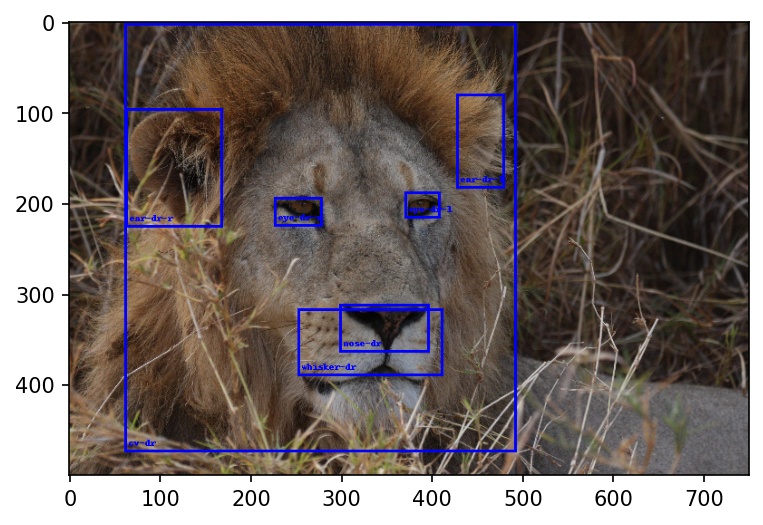


Image id 5 | Image size:torch.Size([3, 2848, 4272])


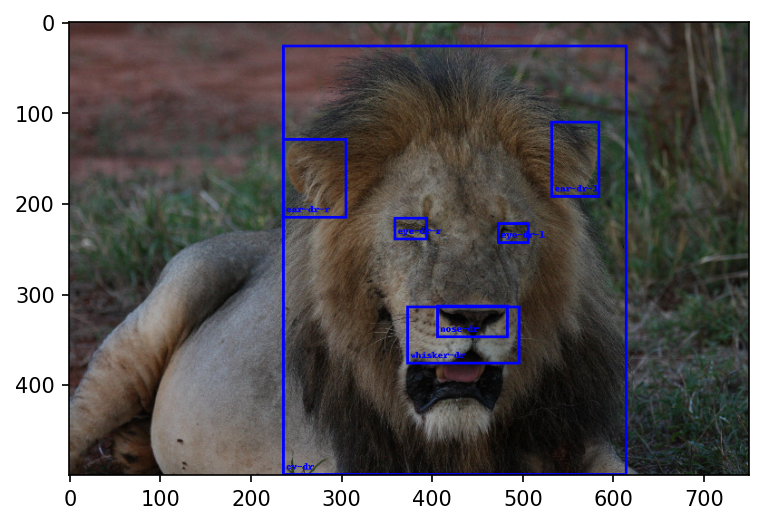


Image id 10 | Image size:torch.Size([3, 3648, 5472])


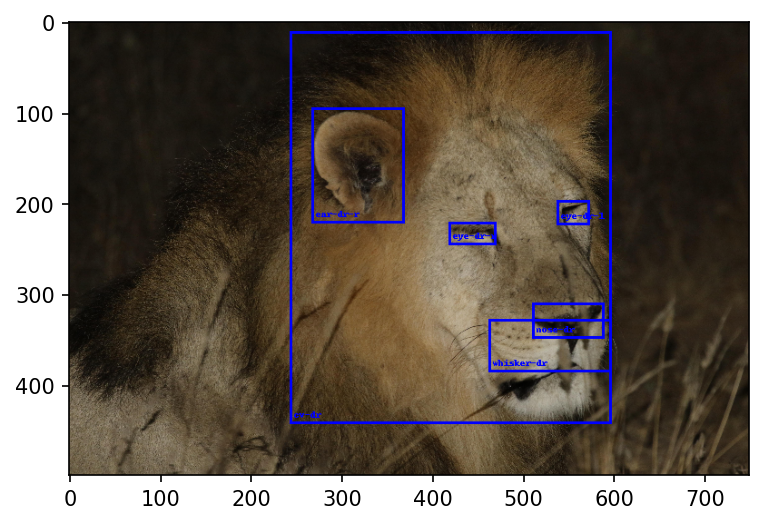

In [36]:
# Run data_loader_train or data_loader_test, but not both together or you will probably run out of GPU memory
print_dataset_samples(data_loader_test)